In [1]:
import numpy as np
import scipy.fftpack as spfft
from sklearn.linear_model import Lasso
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt

In [2]:
filename = "20x20_maze.png"
image = Image.open(filename)

In [3]:
x = np.array(image)

In [4]:
x.shape

(520, 520, 4)

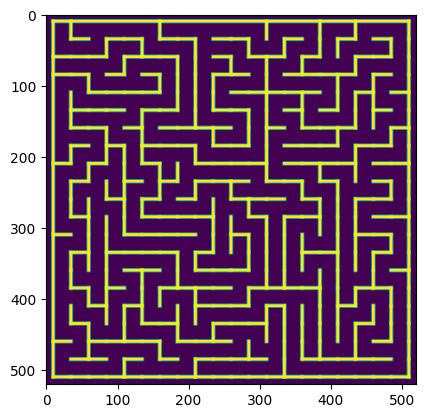

In [6]:
plt.imshow(x[:,:,-1])

In [7]:
image = np.max(image) - np.array(image)[:,:,-1] # use last layer and invert colors
X = np.array(image)
X[X<255] = 0 # sharpen image

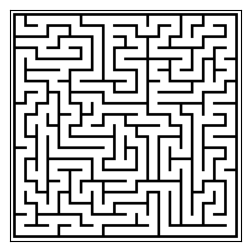

In [8]:
# Visualize the final qtable
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 3))
cmap = "gray"
normalizer = matplotlib.colors.Normalize(vmin=0, vmax=255)
im = matplotlib.cm.ScalarMappable(norm=normalizer, cmap=cmap)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
im = ax.imshow(X,
               cmap=cmap,
               norm=normalizer)

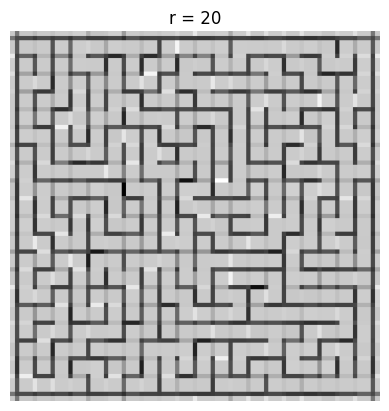

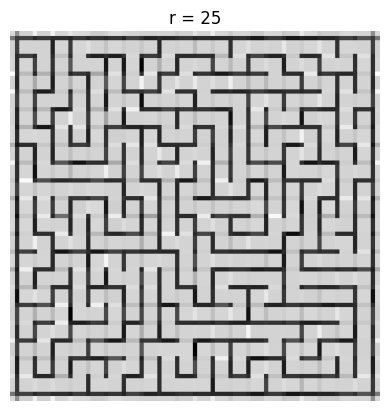

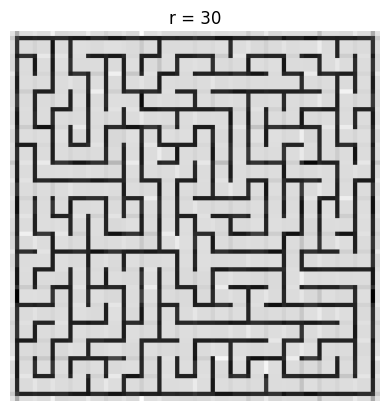

In [9]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

j = 0
for r in (20,25,30,):
    # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox.T)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

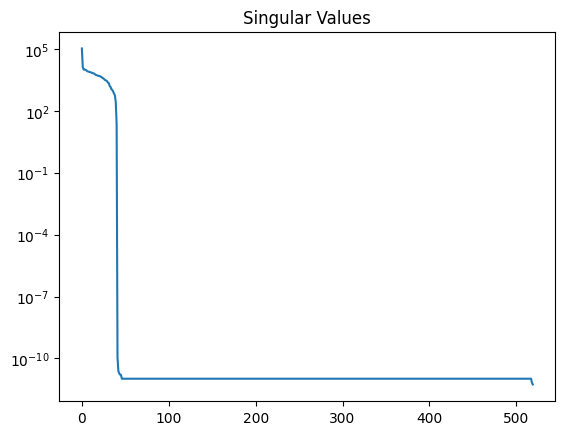

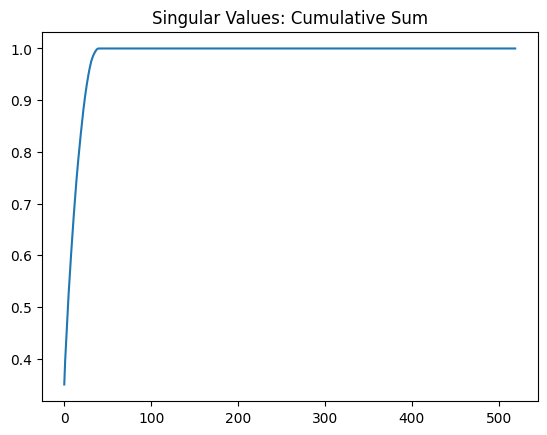

In [10]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()